In [4]:
# imports

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re

import os
#os.chdir('/Users/mateus.ferracini/Documents/pers/projects/case_sulamerica/')
os.chdir('/media/babu/shared_driver/workspace/case_sulamerica')

In [5]:
from src.utils import sulamerica as sl
df = sl.read_data('data/cases_internacao_SUS.xls')
df = sl.rename_data(df)
df = df[df['AIH_aprovadas']>0]
df.head()

,Região/Unidade da Federação,Internações,AIH_aprovadas,Valor_total,Valor_serviços_hospitalares,Val_serv_hosp_-_compl_federal,Val_serv_hosp_-_compl_gestor,Valor_serviços_profissionais,Val_serv_prof_-_compl_federal,Val_serv_prof_-_compl_gestor,Valor_médio_AIH,Valor_médio_intern,Dias_permanência,Média_permanência,Óbitos,Taxa_mortalidade,sheet_name,period,Regiao
0,Região Norte,75363.0,75363.0,65821821.59,50592273.10,282125,-,14820122.53,-,-,873.40,873.40,358202.0,4.8,2149.0,2.85,jul19,2019-07,NORTE_TOTAL
1,Rondônia,9603.0,9603.0,9404751.41,7666945.90,-,-,1737805.51,-,-,979.36,979.36,53043.0,5.5,315.0,3.28,jul19,2019-07,NORTE
2,Amazonas,16248.0,16248.0,15624312.73,12166634.07,1221.31,-,3455637.92,-,-,961.61,961.61,85512.0,5.3,536.0,3.30,jul19,2019-07,NORTE
3,Roraima,4324.0,4324.0,3137537.40,2356231.68,-,-,781305.72,-,-,725.61,725.61,25560.0,5.9,171.0,3.95,jul19,2019-07,NORTE
4,Pará,34774.0,34774.0,28178633.44,21241354.07,248197,-,6581738.70,-,-,810.34,810.34,138135.0,4.0,832.0,2.39,jul19,2019-07,NORTE


In [6]:
df.dtypes

Região/Unidade da Federação       object
Internações                      float64
AIH_aprovadas                    float64
Valor_total                      float64
Valor_serviços_hospitalares      float64
Val_serv_hosp_-_compl_federal     object
Val_serv_hosp_-_compl_gestor      object
Valor_serviços_profissionais     float64
Val_serv_prof_-_compl_federal     object
Val_serv_prof_-_compl_gestor      object
Valor_médio_AIH                  float64
Valor_médio_intern               float64
Dias_permanência                 float64
Média_permanência                float64
Óbitos                           float64
Taxa_mortalidade                 float64
sheet_name                        object
period                            object
Regiao                            object
dtype: object

In [7]:
df['Val_serv_hosp_-_compl_federal'] = pd.to_numeric(df['Val_serv_hosp_-_compl_federal'], errors='coerce')
df['Val_serv_hosp_-_compl_gestor'] = pd.to_numeric(df['Val_serv_hosp_-_compl_gestor'], errors='coerce')

df['Val_serv_prof_-_compl_federal'] = pd.to_numeric(df['Val_serv_prof_-_compl_federal'], errors='coerce')
df['Val_serv_prof_-_compl_gestor'] = pd.to_numeric(df['Val_serv_prof_-_compl_gestor'], errors='coerce')
df = df.fillna(0)
df.dtypes


Região/Unidade da Federação       object
Internações                      float64
AIH_aprovadas                    float64
Valor_total                      float64
Valor_serviços_hospitalares      float64
Val_serv_hosp_-_compl_federal    float64
Val_serv_hosp_-_compl_gestor     float64
Valor_serviços_profissionais     float64
Val_serv_prof_-_compl_federal    float64
Val_serv_prof_-_compl_gestor     float64
Valor_médio_AIH                  float64
Valor_médio_intern               float64
Dias_permanência                 float64
Média_permanência                float64
Óbitos                           float64
Taxa_mortalidade                 float64
sheet_name                        object
period                            object
Regiao                            object
dtype: object

In [8]:
df['hospitalar_total'] = (df['Valor_serviços_hospitalares'] + df['Val_serv_hosp_-_compl_federal'] + df['Valor_serviços_hospitalares'])
df['servicos_total'] = (df['Val_serv_prof_-_compl_federal'] + df['Val_serv_prof_-_compl_gestor'] + df['Valor_serviços_profissionais'])
df['calculado_total'] = df['hospitalar_total'] + df['servicos_total']
df['percentual_servicos'] = df['servicos_total'] / df['calculado_total']
df['percentual_hospitalar'] = df['hospitalar_total'] / df['calculado_total']
df = df[['period', 'Região/Unidade da Federação', 'Internações', 'AIH_aprovadas',
       'Valor_total', 'Valor_médio_AIH', 'Valor_médio_intern',
       'Dias_permanência', 'Média_permanência', 'Óbitos', 'Taxa_mortalidade',
        'Regiao', 'hospitalar_total', 'servicos_total',
       'calculado_total', 'percentual_servicos', 'percentual_hospitalar']]


# EDA

O primeiro passo será conduzir uma análise exploratória para observar o comportamento das variáveis e extrair alguns insights.
A primeira coisa que vamos fazer é um sanity check para ver se não temos nenhum dados faltando e depois explorar a evolução das principais variáveis no período e tentar entender se existe alguma .


In [6]:
df['period'].sort_values().value_counts()

2019-04    33
2018-03    33
2018-05    33
2019-06    33
2018-04    33
2017-12    33
2019-02    33
2018-11    33
2018-07    33
2019-01    33
2018-12    33
2018-09    33
2018-08    33
2019-07    32
Name: period, dtype: int64

In [7]:
df['Região/Unidade da Federação'].value_counts()

Região Sul             14
Piauí                  14
Região Norte           14
Ceará                  14
Bahia                  14
Tocantins              14
Espírito Santo         14
Pará                   14
Rio Grande do Sul      14
Paraná                 14
Mato Grosso            14
Região Nordeste        14
Mato Grosso do Sul     14
Distrito Federal       14
Região Centro-Oeste    14
Goiás                  14
Rondônia               14
Rio de Janeiro         14
Alagoas                14
São Paulo              14
Rio Grande do Norte    14
Minas Gerais           14
Santa Catarina         14
Região Sudeste         14
Pernambuco             14
Total                  14
Sergipe                14
Amapá                  14
Paraíba                14
Maranhão               14
Roraima                14
Amazonas               14
Acre                   13
Name: Região/Unidade da Federação, dtype: int64

In [10]:
df['period'].sort_values().unique()

array(['2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05',
       '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11',
       '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05',
       '2019-06', '2019-07'], dtype=object)

Como podemos ver esta faltando uma observação para o Estado do Acre no período 2019-07. Dessa forma sabemos que o valor das variáveis da região norte para o período estão subestimados (no caso de variáveis absolutas e.g. internações, valores e etc.). Também podemos ver que temos diversos períodos faltando, de forma que para que seja possível estimar um modelo, teremos que inputar esses períodos.

Agora Vamos ver a evolução de algumas variáveis. Primeiro vamos olhas em um nível mais macro.

In [9]:
df = sl.add_period_data(df)

In [10]:
temp_df.fillna(0)

NameError: name 'temp_df' is not defined

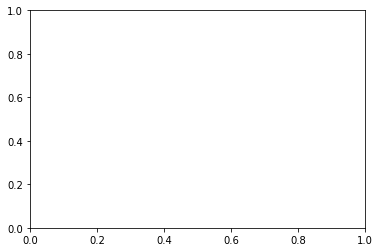

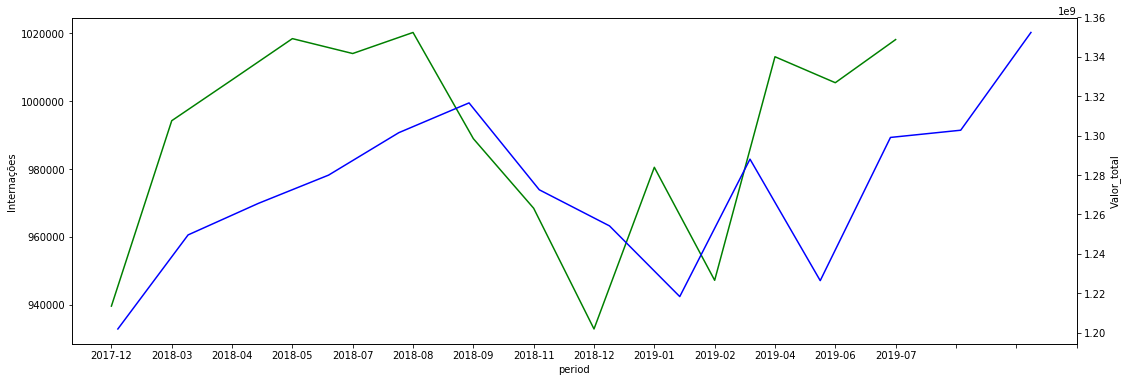

In [27]:

temp_df = df[df['Região/Unidade da Federação']=='Total'].sort_values(by=['period'])

#temp_df['Internações'] = temp_df['Internações'].fillna((temp_df['Internações'].mean()))
#temp_df['Valor_total'] = temp_df['Valor_total'].fillna((temp_df['Valor_total'].mean()))

fig, ax = plt.subplots()

plt.figure(figsize=(18, 6))
ax = sns.lineplot(x='period', y='Internações', data=temp_df, sort=True, color='g')
ax2 = plt.twinx()
sns.lineplot(x='period', y='Valor_total', data=temp_df,  ax=ax2, sort=True, color='b');
ax.set_xticks(range(17))

plt.show()


Como esperado existe uma correlação positiva entre o número total de internações e o valor total gasto.


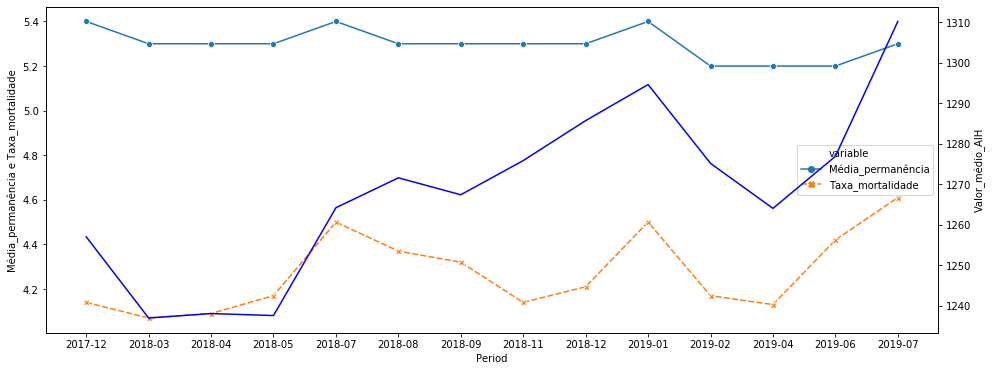

In [46]:
plt.figure(figsize=(16, 6))

melt_df = pd.melt(temp_df, id_vars=['Regiao', 'period'], value_vars=['Média_permanência', 'Taxa_mortalidade']) 
ax = sns.lineplot(x='period', y='value', data=melt_df, sort=True, hue='variable', markers=True,style="variable")
ax.set(xlabel='Period', ylabel='Média_permanência e Taxa_mortalidade')
ax2 = plt.twinx()
sns.lineplot(x='period', y='Valor_médio_AIH', data=temp_df,  ax=ax2, sort=True, color='b', markers=True);

A taxa de mortalidade aparentemente vem crescendo levemente. É interessante observar que ocorreu uma queda na média de permanência, especialmente apartir de 2019-02. Outro fato interessante é que mesmo com uma queda na média de permanência o valor médio da AIH vem aumentando constantemente. Pode ser que a composição dos custos (serviços e hospitalar) tenha mudado... Mas, como mostrado no gráfico abaixo, eles permaneceram relativamente constantes no período analisado.

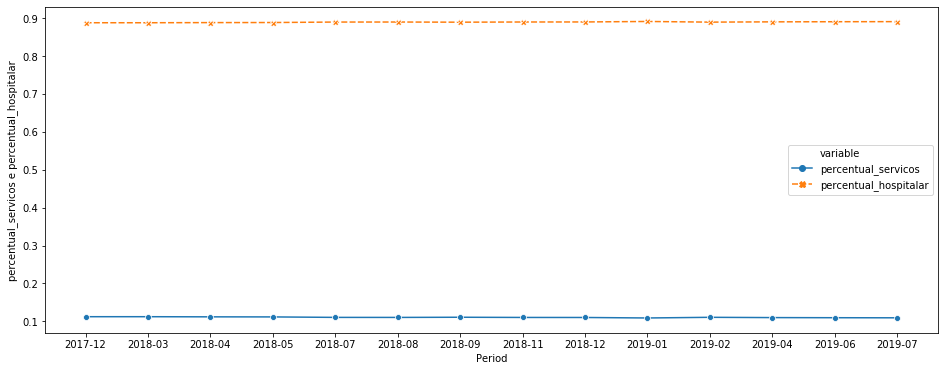

In [45]:
plt.figure(figsize=(16, 6))
melt_df = pd.melt(temp_df, id_vars=['Regiao', 'period'], value_vars=['percentual_servicos', 'percentual_hospitalar'])
ax = sns.lineplot(x='period', y='value', data=melt_df, sort=True, hue='variable', markers=True, style="variable")
ax.set(xlabel='Period', ylabel='percentual_servicos e percentual_hospitalar');


Para entender melhor vamos avaliar os dados por região.

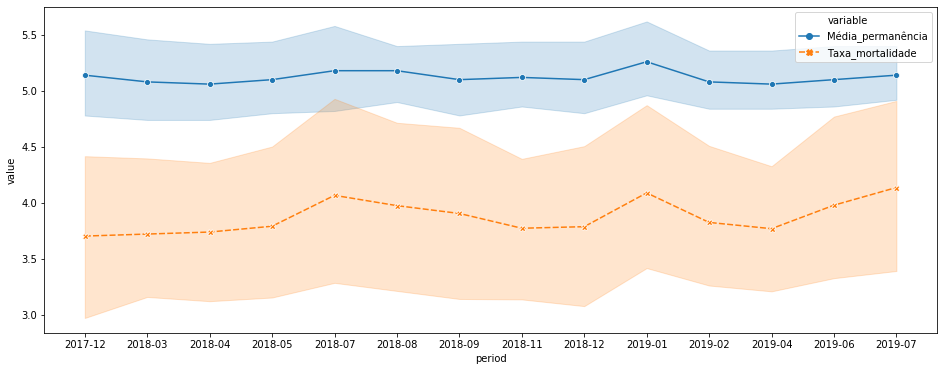

In [48]:
temp_df = df[df['Regiao'].str.contains("_TOTAL")].sort_values(by=['period'])
melt_df = pd.melt(temp_df, id_vars=['Regiao', 'period'], value_vars=['Média_permanência', 'Taxa_mortalidade'])
plt.figure(figsize=(16, 6))
sns.lineplot(x='period', y='value', data=melt_df, sort=True, hue='variable', markers=True,style="variable");


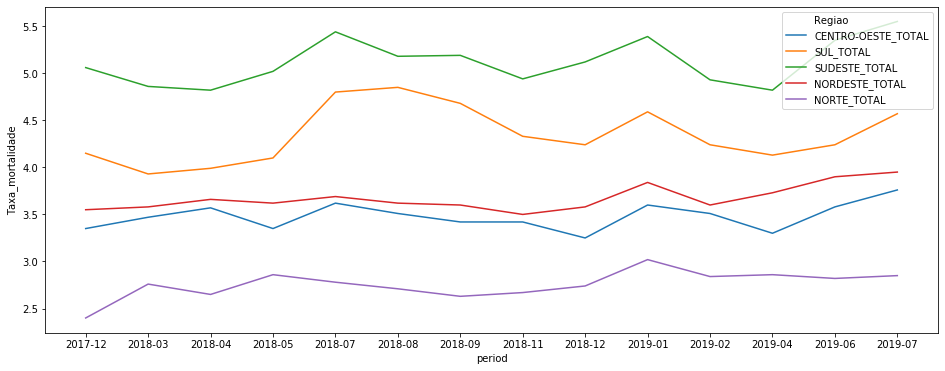

In [52]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='period', y='Taxa_mortalidade', data=temp_df, sort=True, hue='Regiao', markers=True);


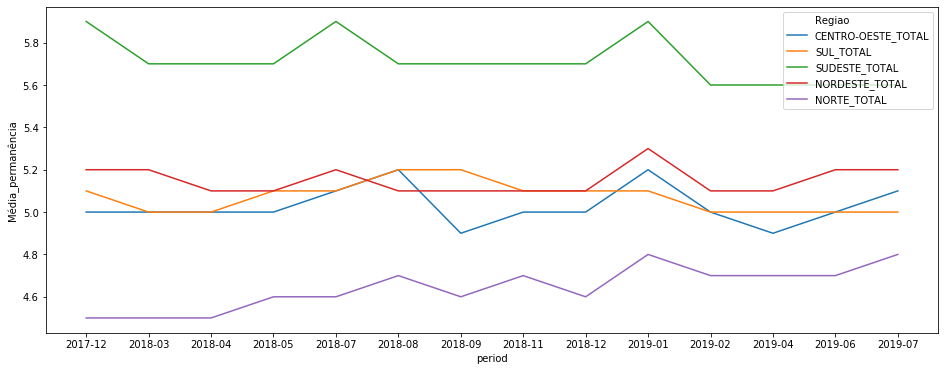

In [53]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='period', y='Média_permanência', data=temp_df, sort=True, hue='Regiao', markers=True);


In [55]:
df['period'].sort_values().unique()

array(['2017-12', '2018-03', '2018-04', '2018-05', '2018-07', '2018-08',
       '2018-09', '2018-11', '2018-12', '2019-01', '2019-02', '2019-04',
       '2019-06', '2019-07'], dtype=object)

In [2]:
temp_df = df[!(df['Regiao'].str.contains("TOTAL"))].sort_values(by=['period'])
temp_df.head()

SyntaxError: invalid syntax (<ipython-input-2-e97d84ab5ad8>, line 1)

In [25]:
~(df['Regiao'].str.contains("TOTAL", na=False))

0      False
1       True
2       True
3       True
4       True
       ...  
655     True
656     True
657     True
658     True
659    False
Name: Regiao, Length: 660, dtype: bool

# Impute Missing Values


In [32]:
temp_df = df[~(df['Regiao'].str.contains("TOTAL", na=False))]

In [33]:
temp_df.head()

,period,Região/Unidade da Federação,Internações,AIH_aprovadas,Valor_total,Valor_médio_AIH,Valor_médio_intern,Dias_permanência,Média_permanência,Óbitos,Taxa_mortalidade,Regiao,hospitalar_total,servicos_total,calculado_total,percentual_servicos,percentual_hospitalar
1,2017-12,Rondônia,9783.0,9783.0,7507845.13,767.44,767.44,42043.0,4.3,235.0,2.40,NORTE,11862772.36,1576458.95,13439231.31,0.117303,0.882697
2,2017-12,Acre,3463.0,3487.0,2610454.55,748.62,753.81,16660.0,4.8,106.0,3.06,NORTE,3932617.30,644145.90,4576763.20,0.140743,0.859257
3,2017-12,Amazonas,14337.0,14337.0,13169660.32,918.58,918.58,72629.0,5.1,403.0,2.81,NORTE,20040229.72,3149545.46,23189775.18,0.135816,0.864184
4,2017-12,Roraima,3513.0,3513.0,2635287.45,750.15,750.15,18231.0,5.2,87.0,2.48,NORTE,3972654.94,648959.98,4621614.92,0.140418,0.859582
5,2017-12,Pará,40967.0,40967.0,34426413.15,840.34,840.34,167386.0,4.1,859.0,2.10,NORTE,51943774.00,7942298.87,59886072.87,0.132623,0.867377


In [36]:
regiao_list = df['Região/Unidade da Federação'].unique()
print(regiao_list)

['Região Norte' 'Rondônia' 'Acre' 'Amazonas' 'Roraima' 'Pará' 'Amapá'
 'Tocantins' 'Região Nordeste' 'Maranhão' 'Piauí' 'Ceará'
 'Rio Grande do Norte' 'Paraíba' 'Pernambuco' 'Alagoas' 'Sergipe' 'Bahia'
 'Região Sudeste' 'Minas Gerais' 'Espírito Santo' 'Rio de Janeiro'
 'São Paulo' 'Região Sul' 'Paraná' 'Santa Catarina' 'Rio Grande do Sul'
 'Região Centro-Oeste' 'Mato Grosso do Sul' 'Mato Grosso' 'Goiás'
 'Distrito Federal' 'Total']


In [37]:
df_list = df[df['Região/Unidade da Federação'] == 'Goiás']

In [40]:
df_list.head(50)

,period,Região/Unidade da Federação,Internações,AIH_aprovadas,Valor_total,Valor_médio_AIH,Valor_médio_intern,Dias_permanência,Média_permanência,Óbitos,Taxa_mortalidade,Regiao,hospitalar_total,servicos_total,calculado_total,percentual_servicos,percentual_hospitalar
30,2017-12,Goiás,26601.0,27206.0,34331316.98,1261.90,1290.60,127847.0,4.8,875.0,3.29,CENTRO-OESTE,54711435.17,6416429.49,61127864.66,0.104967,0.895033
63,2018-01,Goiás,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,2018-02,Goiás,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,2018-03,Goiás,27890.0,28527.0,35353238.97,1239.29,1267.60,131802.0,4.7,959.0,3.44,CENTRO-OESTE,56909143.41,6785279.01,63694422.42,0.106529,0.893471
162,2018-04,Goiás,27058.0,27636.0,33126994.54,1198.69,1224.30,125777.0,4.6,887.0,3.28,CENTRO-OESTE,53043811.56,6442828.08,59486639.64,0.108307,0.891693
195,2018-05,Goiás,28492.0,29040.0,33321916.56,1147.45,1169.52,130613.0,4.6,890.0,3.12,CENTRO-OESTE,53453359.02,6450739.53,59904098.55,0.107684,0.892316
228,2018-06,Goiás,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,2018-07,Goiás,27002.0,27573.0,35009953.87,1269.72,1296.57,130266.0,4.8,964.0,3.57,CENTRO-OESTE,56234144.06,6757008.98,62991153.04,0.107269,0.892731
294,2018-08,Goiás,27281.0,27883.0,33899286.36,1215.77,1242.60,131985.0,4.8,919.0,3.37,CENTRO-OESTE,54474305.20,6597901.56,61072206.76,0.108034,0.891966
327,2018-09,Goiás,27826.0,28420.0,33936535.21,1194.11,1219.60,133081.0,4.8,944.0,3.39,CENTRO-OESTE,54351176.36,6538741.52,60889917.88,0.107386,0.892614


In [39]:
df_list['Internações'].interpolate()

30     26601.000000
63     27030.666667
96     27460.333333
129    27890.000000
162    27058.000000
195    28492.000000
228    27747.000000
261    27002.000000
294    27281.000000
327    27826.000000
360    27106.000000
393    26386.000000
426    26818.000000
459    27005.000000
492    26070.000000
525    27252.000000
558    28434.000000
591    28228.500000
624    28023.000000
657    27835.000000
Name: Internações, dtype: float64